<Response [200]>
200
{"login":"saeidehmir","id":125218039,"node_id":"U_kgDOB3as9w","avatar_url":"https://avatars.githubusercontent.com/u/125218039?v=4","gravatar_id":"","url":"https://api.github.com/users/saeidehmir","html_url":"https://github.com/saeidehmir","followers_url":"https://api.github.com/users/saeidehmir/followers","following_url":"https://api.github.com/users/saeidehmir/following{/other_user}","gists_url":"https://api.github.com/users/saeidehmir/gists{/gist_id}","starred_url":"https://api.github.com/users/saeidehmir/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/saeidehmir/subscriptions","organizations_url":"https://api.github.com/users/saeidehmir/orgs","repos_url":"https://api.github.com/users/saeidehmir/repos","events_url":"https://api.github.com/users/saeidehmir/events{/privacy}","received_events_url":"https://api.github.com/users/saeidehmir/received_events","type":"User","site_admin":false,"name":null,"company":null,"blog":"","location":null,"

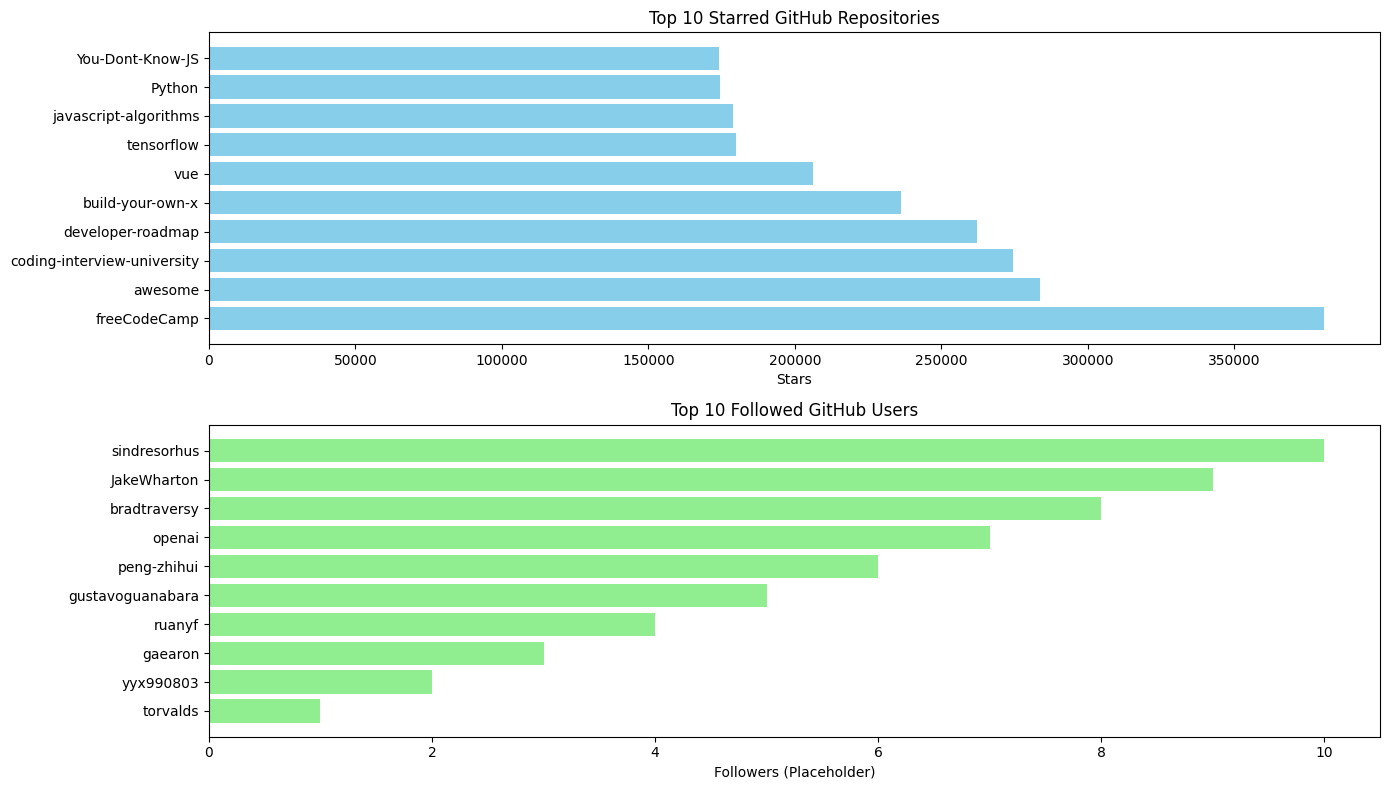

In [6]:
import requests
import json
from pprint import pprint

from google.colab import userdata
token = userdata.get('ghtoken')

url = "https://api.github.com/user"
headers = {"Authorization": "Bearer " + token}

r = requests.get(url, headers=headers)

print(r)
print(r.status_code)
print(r.text)

r_json = json.loads(r.text)
pprint(r_json)

#import requests
import matplotlib.pyplot as plt

# Fetch top 10 starred repos
repos_response = requests.get('https://api.github.com/search/repositories?q=stars:>1&sort=stars', headers=headers)
starred_repos = repos_response.json()['items'][:10]

# Fetch top 10 users
users_response = requests.get('https://api.github.com/search/users?q=followers:>1&sort=followers', headers=headers)
users = users_response.json()['items'][:10]

# Extracting data for visualization
repo_names = [repo['name'] for repo in starred_repos]
repo_stars = [repo['stargazers_count'] for repo in starred_repos]

user_logins = [user['login'] for user in users]
user_followers = [user['followers_url'] for user in users]  # This gives URL, you might need additional API call to get count

# Visualization with Matplotlib
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.barh(repo_names, repo_stars, color='skyblue')
plt.xlabel('Stars')
plt.title('Top 10 Starred GitHub Repositories')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.barh(user_logins, range(1, 11), color='lightgreen')  # Placeholder for followers
plt.xlabel('Followers (Placeholder)')
plt.title('Top 10 Followed GitHub Users')
plt.tight_layout()

plt.show()
